In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('experiment_1_noise_result.csv')

In [9]:
df

,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,causal_mech,dataset,dataset_name,dataset_index,algo
0,0,0.518519,0.684211,1.000000,33,21,5,7,54,38,211.796110,mix_mechanism,medium_no_issue_noise_1,medium_no_issue_noise,1,cam
1,0,0.659574,0.421053,1.107143,44,22,13,9,47,38,12.092743,mix_mechanism,medium_no_issue_noise_1,medium_no_issue_noise,1,notears
2,0,0.500000,0.606061,0.606061,26,13,6,7,40,33,139.917605,mix_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,cam
3,0,0.727273,0.272727,0.727273,39,15,15,9,33,33,12.044022,mix_mechanism,medium_no_issue_noise_2,medium_no_issue_noise,2,notears
4,0,0.500000,0.463415,0.760000,34,12,15,7,38,41,131.861814,mix_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,cam
5,0,0.536585,0.463415,0.880000,38,16,16,6,41,41,11.816162,mix_mechanism,medium_no_issue_noise_3,medium_no_issue_noise,3,notears
6,0,0.510638,0.560976,0.960000,32,14,8,10,47,41,150.651066,mix_mechanism,medium_no_issue_noise_4,medium_no_issue_noise,4,cam
7,0,0.536585,0.463415,0.880000,36,14,14,8,41,41,34.768903,mix_mechanism,medium_no_issue_noise_4,medium_no_issue_noise,4,notears
8,0,0.666667,0.425000,1.307692,42,19,8,15,51,40,172.807196,mix_mechanism,medium_no_issue_noise_5,medium_no_issue_noise,5,cam
9,0,0.673077,0.425000,1.346154,44,21,9,14,52,40,11.414005,mix_mechanism,medium_no_issue_noise_5,medium_no_issue_noise,5,notears


In [10]:
grouped_df = df.groupby(by=['dataset_name', 'algo']).aggregate('mean').reset_index()
grouped_df

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_no_issue_no_noise,cam,0.0,0.475801,0.607658,0.804557,29.2,14.2,7.6,7.4,45.2,38.6,155.579762,3.0
1,medium_no_issue_no_noise,notears,0.0,0.593513,0.485399,1.042323,38.0,18.4,10.0,9.6,47.0,38.6,17.209467,3.0
2,medium_no_issue_noise,cam,0.0,0.539165,0.547932,0.926751,33.4,15.8,8.4,9.2,46.0,38.6,161.406758,3.0
3,medium_no_issue_noise,notears,0.0,0.626619,0.409122,0.988114,40.2,17.6,13.4,9.2,42.8,38.6,16.427167,3.0


In [11]:
grouped_df[grouped_df['dataset_name']=='medium_all']

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index


In [12]:
melt_rate_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['fdr', 'tpr', 'fpr'], value_name='rate', var_name='measurement')
melt_rate_df.head()

,dataset_name,algo,dataset_index,measurement,rate
0,medium_no_issue_no_noise,cam,3.0,fdr,0.475801
1,medium_no_issue_no_noise,notears,3.0,fdr,0.593513
2,medium_no_issue_noise,cam,3.0,fdr,0.539165
3,medium_no_issue_noise,notears,3.0,fdr,0.626619
4,medium_no_issue_no_noise,cam,3.0,tpr,0.607658


In [13]:
melt_abs_err_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['shd', 'false_pos', 'false_neg', 'reserved_edges', 'pred_size', 'true_size'], value_name='value', var_name='measurement')
melt_abs_err_df.head()

,dataset_name,algo,dataset_index,measurement,value
0,medium_no_issue_no_noise,cam,3.0,shd,29.2
1,medium_no_issue_no_noise,notears,3.0,shd,38.0
2,medium_no_issue_noise,cam,3.0,shd,33.4
3,medium_no_issue_noise,notears,3.0,shd,40.2
4,medium_no_issue_no_noise,cam,3.0,false_pos,14.2


In [14]:
melt_time_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['timing'], value_name='seconds', var_name='measurement')
melt_time_df.head()


,dataset_name,algo,dataset_index,measurement,seconds
0,medium_no_issue_no_noise,cam,3.0,timing,155.579762
1,medium_no_issue_no_noise,notears,3.0,timing,17.209467
2,medium_no_issue_noise,cam,3.0,timing,161.406758
3,medium_no_issue_noise,notears,3.0,timing,16.427167


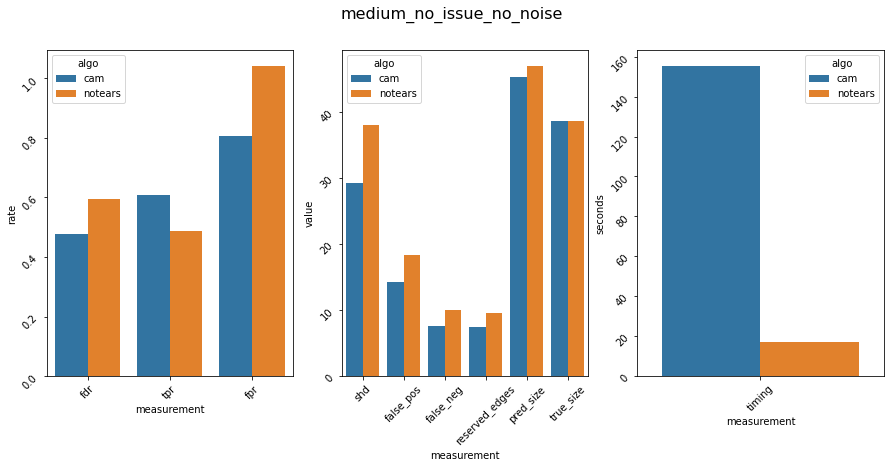

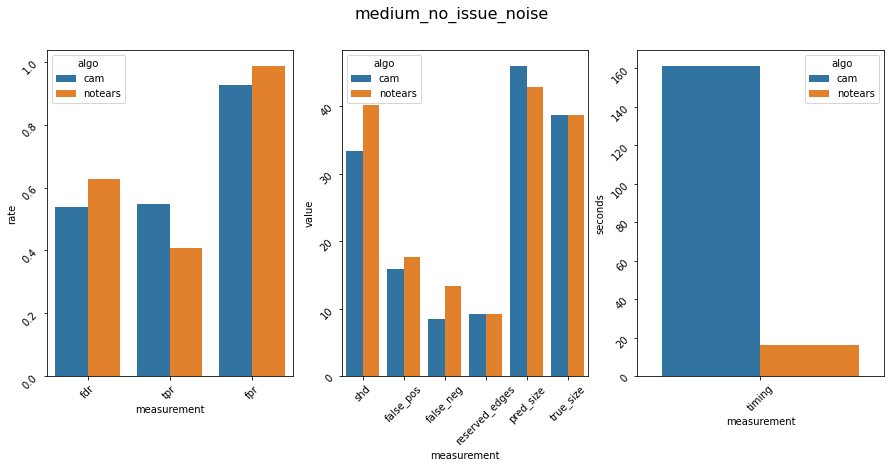

In [15]:
for dataset in melt_rate_df['dataset_name'].unique():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
    sns.barplot(ax=ax1, y='rate', x='measurement',data=melt_rate_df[melt_rate_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax2, y='value', x='measurement',data=melt_abs_err_df[melt_abs_err_df['dataset_name']==dataset], hue='algo')
    sns.barplot(ax=ax3, y='seconds', x='measurement',data=melt_time_df[melt_time_df['dataset_name']==dataset], hue='algo')
    ax1.tick_params(labelrotation=45)
    ax2.tick_params(labelrotation=45)
    ax3.tick_params(labelrotation=45)
    fig.suptitle(dataset, fontsize=16)
    plt.show()